# Marketing do Banco

Com o dataset escolhido, pretende-se analisar um conjunto de dados onde se identifica conhecimento sobre as campanhas
promocionais realizadas por um banco em que se pretende prever a adesão dos clientes após o
contacto promocional.


## O dataset contem 45211 casos e 17 features. 

### Input features (bank client data)
 - age - (numeric) 
 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
 - education (categorical: 'tertiary' 'secondary' 'unknown' 'primary')
 - default: has credit in default? (categorical: 'no','yes','unknown')
 - balance: Balance the client possesses
 - housing: has housing loan? (categorical: 'no','yes','unknown')
 - loan: has personal loan? (categorical: 'no','yes','unknown')
 - contact: contact communication type (categorical: 'cellular','telephone')
 - day: last contact day (numeric)
 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
 - previous: number of contacts performed before this campaign and for this client (numeric)
 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','unknown', 'other','success')

## Output variable (desired target):
 - y - has the client subscribed a term deposit? (binary: 'yes','no')
 
### Disponível em : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline

/home/josefam/miniconda3/envs/daa/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/josefam/miniconda3/envs/daa/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/josefam/miniconda3/envs/daa/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/josefam/miniconda3/envs/daa/lib/python3.7/s

## Organização do dataset
O dataset está no formato CSV. Contudo, o separador das colunas 'e o ';'.

In [2]:
bank = pd.read_csv('bank-full.csv', sep=';')

## Exploração dos dados

Vista básica do dataset, inicial.

In [3]:
bank.shape

(45211, 17)

In [4]:
print(bank.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [5]:
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Missing Values

Verifica-se que no dataset não existem valores perdidos.

In [7]:
bank.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [8]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
bank.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

## Valores Duplicados

O dataset não tem qualquer valor duplicado.
Tratamento para caso tenha (drop).

In [10]:
print(bank.duplicated().sum())
print(bank.drop_duplicates(inplace=True))
print(bank.info())

0
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB
None


## Analisar a correspondência entre o target output e os atributos categóricos

 - 1) Analisar o target com o número de ocorrências no dataset;
 - 2) Analisar o target com o trabalho do cliente;
 - 3) Analisar o target com o estado civil do cliente;
 - 4) Analisar o target com o tipo de contacto do cliente;
 - 5) Analisar o target com o resultado da campanha anterior;
 - 6) Analisar o target com o nível de educação do cliente;
 - 7) Analisar o target com o mês onde a campanha foi efetuada;
 - 8) Analisar o target com o estado do crédito;
 - 9) Analisar o target com o empr imobiliário do cliente;
 - 10) Analisar o target com o facto do cliente ter ou não um empréstimo;

<AxesSubplot:title={'center':'Subscreveu ou não a um depósito'}>

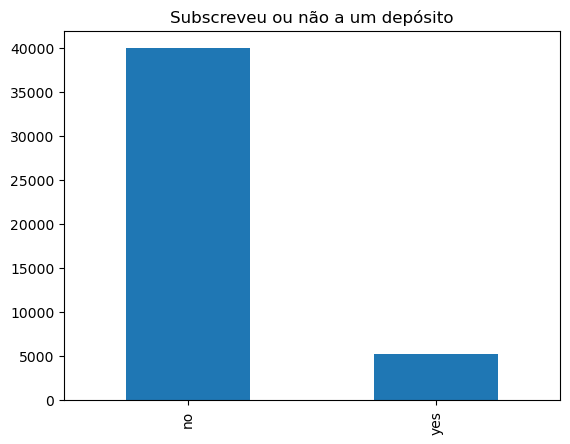

In [11]:
y_count = bank['y'].value_counts()
y_count.plot.bar(title = 'Subscreveu ou não a um depósito')

<AxesSubplot:title={'center':'Trabalho e target output'}>

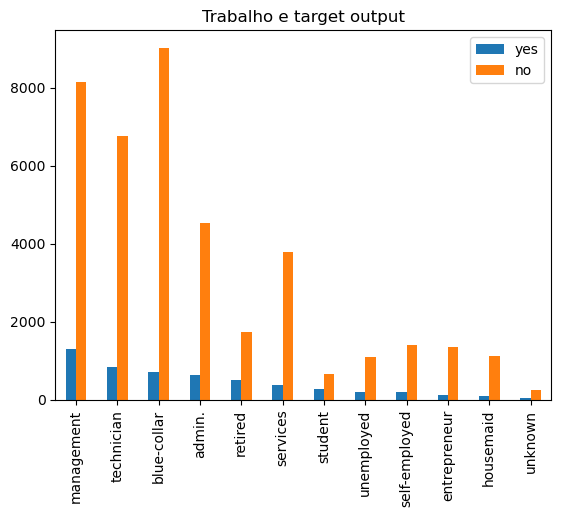

In [12]:
job_target = pd.DataFrame()

job_target['yes'] = bank[bank['y'] == 'yes']['job'].value_counts()
job_target['no'] = bank[bank['y'] == 'no']['job'].value_counts()

job_target.plot.bar(title = 'Trabalho e target output')

In [13]:
#percentagem de pessoas que subscreveram um depósito por profissão
(job_target['yes'] / (job_target['yes'] + job_target['no'])) * 100

management       13.755551
technician       11.056996
blue-collar       7.274969
admin.           12.202669
retired          22.791519
services          8.883004
student          28.678038
unemployed       15.502686
self-employed    11.842939
entrepreneur      8.271688
housemaid         8.790323
unknown          11.805556
dtype: float64

<AxesSubplot:title={'center':'Estado Civil e target output'}>

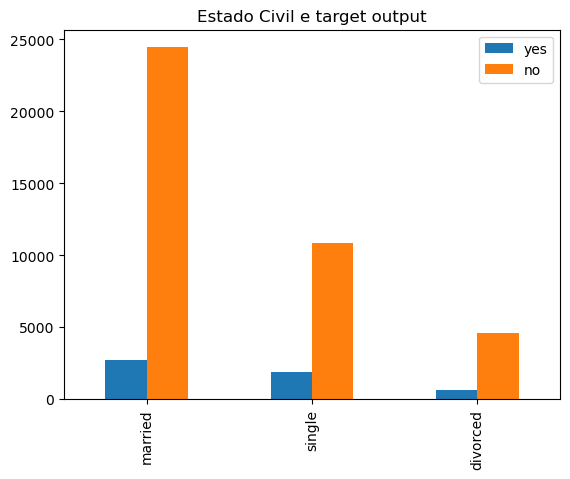

In [14]:
marital_target = pd.DataFrame()

marital_target['yes'] = bank[bank['y'] == 'yes']['marital'].value_counts()
marital_target['no'] = bank[bank['y'] == 'no']['marital'].value_counts()

marital_target.plot.bar(title = 'Estado Civil e target output')

In [15]:
#percentagem de pessoas que subscreveram um depósito por estado civil
(marital_target['yes'] / (marital_target['yes'] + marital_target['no'])) * 100

married     10.123466
single      14.949179
divorced    11.945458
dtype: float64

<AxesSubplot:title={'center':'Tipo de contacto e target output'}>

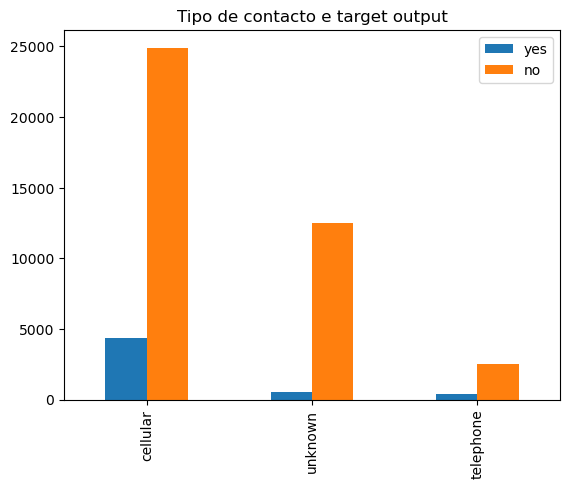

In [16]:
contact_target = pd.DataFrame()

contact_target['yes'] = bank[bank['y'] == 'yes']['contact'].value_counts()
contact_target['no'] = bank[bank['y'] == 'no']['contact'].value_counts()

contact_target.plot.bar(title = 'Tipo de contacto e target output')

In [17]:
#percentagem de pessoas que subscreveram um depósito por tipo de contacto
(contact_target['yes'] / (contact_target['yes'] + contact_target['no'])) * 100


cellular     14.918900
unknown       4.070661
telephone    13.420509
dtype: float64

<AxesSubplot:title={'center':'Resultado da campanha anterior e target output'}>

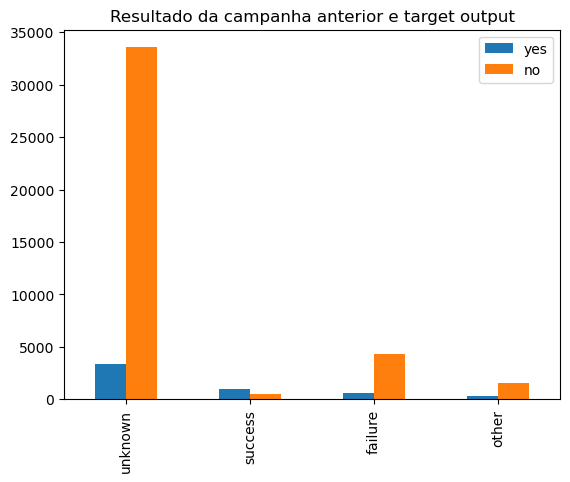

In [18]:
poutcome_target = pd.DataFrame()

poutcome_target['yes'] = bank[bank['y'] == 'yes']['poutcome'].value_counts()
poutcome_target['no'] = bank[bank['y'] == 'no']['poutcome'].value_counts()

poutcome_target.plot.bar(title = 'Resultado da campanha anterior e target output')

In [19]:
#percentagem de pessoas que subscreveram um depósito por resultado da campanha anterior
(poutcome_target['yes'] / (poutcome_target['yes'] + poutcome_target['no'])) * 100

unknown     9.161503
success    64.725347
failure    12.609671
other      16.684783
dtype: float64

<AxesSubplot:title={'center':'Nível da educação e target output'}>

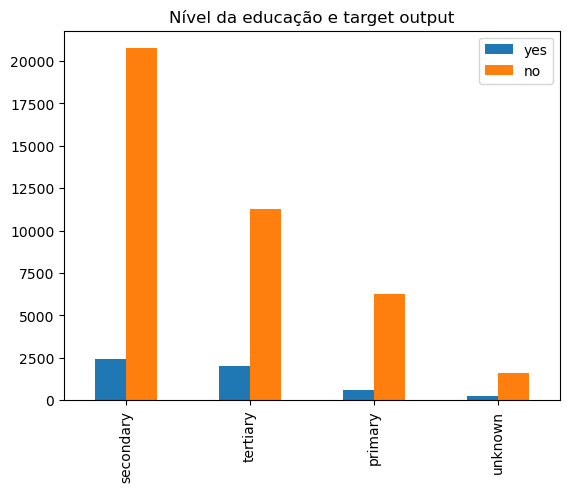

In [20]:
edu_target = pd.DataFrame()

edu_target['yes'] = bank[bank['y'] == 'yes']['education'].value_counts()
edu_target['no'] = bank[bank['y'] == 'no']['education'].value_counts()

edu_target.plot.bar(title = 'Nível da educação e target output')

In [21]:
#percentagem de pessoas que subscreveram um depósito por nível de educação
(edu_target['yes'] / (edu_target['yes'] + edu_target['no'])) * 100

secondary    10.559435
tertiary     15.006390
primary       8.626478
unknown      13.570275
dtype: float64

<AxesSubplot:title={'center':'Mês e target output'}>

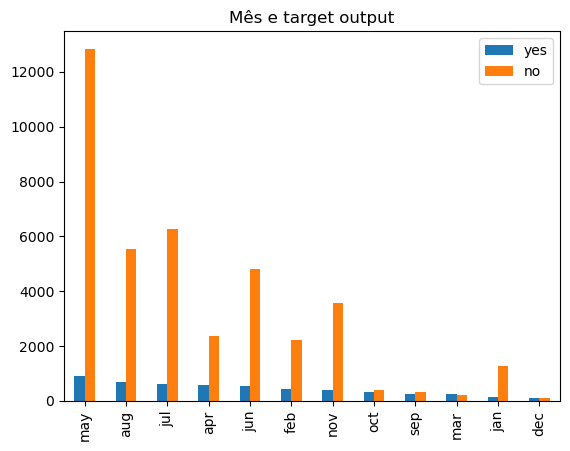

In [22]:
mon_target = pd.DataFrame()

mon_target['yes'] = bank[bank['y'] == 'yes']['month'].value_counts()
mon_target['no'] = bank[bank['y'] == 'no']['month'].value_counts()

mon_target.plot.bar(title = 'Mês e target output')

In [23]:
#percentagem de pessoas que subscreveram um depósito por mês
(mon_target['yes'] / (mon_target['yes'] + mon_target['no'])) * 100

may     6.719454
aug    11.013286
jul     9.093546
apr    19.679400
jun    10.222805
feb    16.647792
nov    10.151134
oct    43.766938
sep    46.459413
mar    51.991614
jan    10.121169
dec    46.728972
dtype: float64

<AxesSubplot:title={'center':'Crédito por default e target output'}>

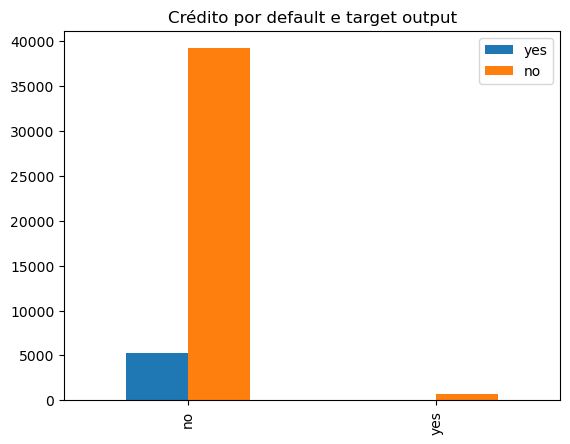

In [24]:
def_target = pd.DataFrame()

def_target['yes'] = bank[bank['y'] == 'yes']['default'].value_counts()
def_target['no'] = bank[bank['y'] == 'no']['default'].value_counts()

def_target.plot.bar(title = 'Crédito por default e target output')

<AxesSubplot:title={'center':'Empréstimo imobiliário e target output'}>

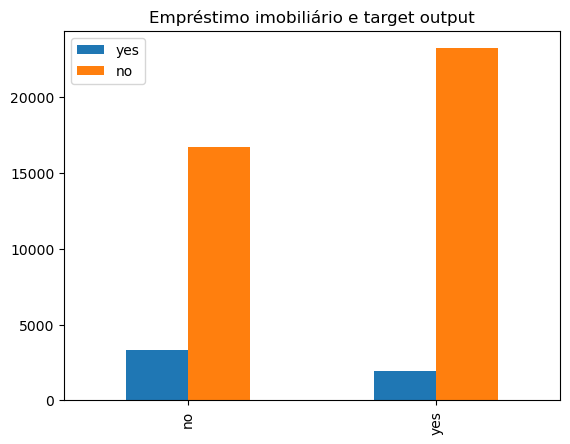

In [25]:
hou_target = pd.DataFrame()

hou_target['yes'] = bank[bank['y'] == 'yes']['housing'].value_counts()
hou_target['no'] = bank[bank['y'] == 'no']['housing'].value_counts()

hou_target.plot.bar(title = 'Empréstimo imobiliário e target output')

In [26]:
#percentagem de pessoas que subscreveram um depósito por empréstimo imobiliário
(hou_target['yes'] / (hou_target['yes'] + hou_target['no'])) * 100

no     16.702355
yes     7.699960
dtype: float64

<AxesSubplot:title={'center':'Empréstimo pessoal e target output'}>

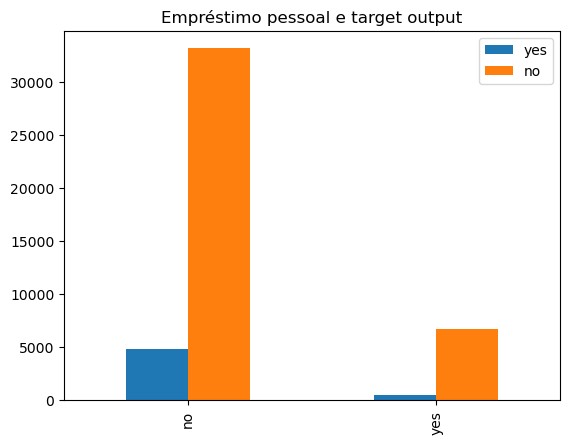

In [27]:
loan_target = pd.DataFrame()

loan_target['yes'] = bank[bank['y'] == 'yes']['loan'].value_counts()
loan_target['no'] = bank[bank['y'] == 'no']['loan'].value_counts()

loan_target.plot.bar(title = 'Empréstimo pessoal e target output')

In [28]:
#percentagem de pessoas que subscreveram um depósito por empréstimo pessoal
(loan_target['yes'] / (loan_target['yes'] + loan_target['no'])) * 100

no     12.655727
yes     6.681391
dtype: float64

## Preparação dos Dados

### Valores categóricos binários 'yes' ou 'no'

Transformar em valores numéricos:
 - yes (target)
 - default
 - housing
 - loan

In [29]:
bank['y'] = np.where(bank['y'] == "yes", 1, 0)
bank['default'] = np.where(bank['default'] == "yes", 1, 0)
bank['housing'] = np.where(bank['housing'] == "yes", 1, 0)
bank['loan'] = np.where(bank['loan'] == "yes", 1, 0)

### Atributo 'month'

Através de label encoding, dado aos meses terem uma ordem explícita, pelos quais estão organizados.
Verificou-se em cima que em março a percentagem de aceitação do depósito é maior.

In [30]:
map_month = {'month' : {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}}
bank.replace(map_month, inplace=True)

### Atributo 'pdays'

Para este atributo "-1" simboliza que o cliente não foi contactado ou que não existe informação sobre esse dados.
No entanto, mais de 75% dos dados da coluna,m então seria melhor retirá-la; dado a ser muito inconsistente.
Contudo, este possui uma correlação não precedente. pelo que manteve-se.

<AxesSubplot:title={'center':'Número de dias que passaram após o último contacto de uma campanha anterior e target output'}>

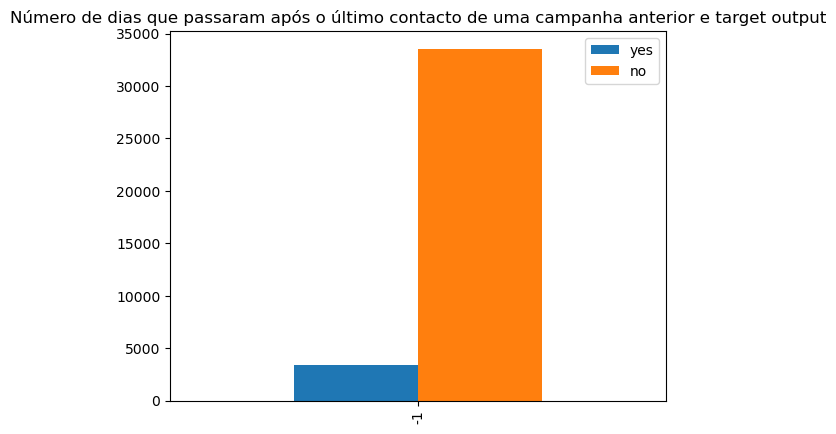

In [31]:
pdays = pd.DataFrame()

pdays['yes'] = bank[(bank['y'] == 1) & (bank['pdays'] == -1)]['pdays'].value_counts()
pdays['no'] = bank[(bank['y'] == 0) & (bank['pdays'] == -1)]['pdays'].value_counts()
pdays.plot.bar(title = 'Número de dias que passaram após o último contacto de uma campanha anterior e target output')

<AxesSubplot:title={'center':'Número de dias que passaram após o último contacto de uma campanha anterior e target output'}>

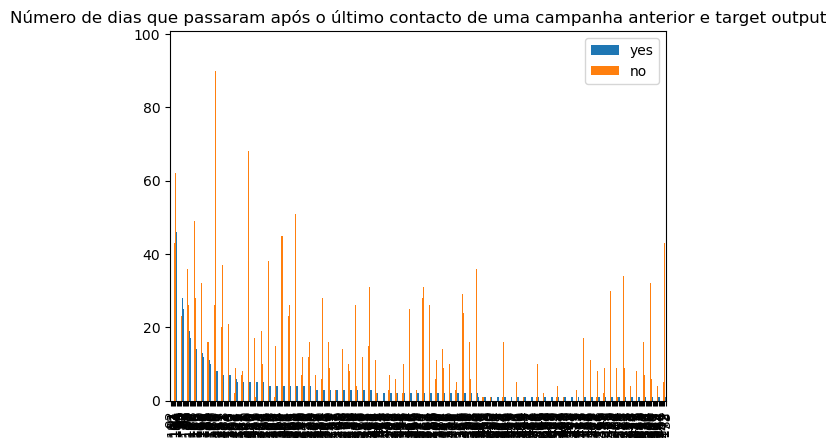

In [32]:
pdays_0 = pd.DataFrame()
pdays_0['yes'] = bank[(bank['y'] == 1) & (bank['pdays'] > -1)]['pdays'].value_counts()
pdays_0['no'] = bank[(bank['y'] == 0) & (bank['pdays'] > -1)]['pdays'].value_counts()
pdays_0.plot.bar(title = 'Número de dias que passaram após o último contacto de uma campanha anterior e target output')

In [33]:
#dividir o atributor pdays em 2 grupos: pdays = -1 e pdays > -1 e depois divir o grupo pdays > -1 em k bins
replace_map = {'pdays' : {}}
months = 0
for i in range(1, bank['pdays'].max() + 1):
    replace_map['pdays'][i] = months
    if i % 30 == 0:
        months += 1

bank.replace(replace_map, inplace=True)
bank

age           job   marital  education  default  balance  housing  \
0       58    management   married   tertiary        0     2143        1   
1       44    technician    single  secondary        0       29        1   
2       33  entrepreneur   married  secondary        0        2        1   
3       47   blue-collar   married    unknown        0     1506        1   
4       33       unknown    single    unknown        0        1        0   
...    ...           ...       ...        ...      ...      ...      ...   
45206   51    technician   married   tertiary        0      825        0   
45207   71       retired  divorced    primary        0     1729        0   
45208   72       retired   married  secondary        0     5715        0   
45209   57   blue-collar   married  secondary        0      668        0   
45210   37  entrepreneur   married  secondary        0     2971        0   

       loan    contact  day  month  duration  campaign  pdays  previous  \
0         0    unknown    5      5       261         1     -1         0   
1         0    unknown    5      5       151         1     -1         0   
2         1    unknown    5      5        76         1     -1         0   
3         0    unknown    5      5        92         1     -1         0   
4         0    unknown    5      5       198         1     -1         0   
...     ...        ...  ...    ...       ...       ...    ...       ...   
45206     0   cellular   17     11       977         3     -1         0   
45207     0   cellular   17     11       456         2     -1         0   
45208     0   cellular   17     11      1127         5      6         3   
45209     0  telephone   17     11       508         4     -1         0   
45210     0   cellular   17     11       361         2      6        11   

      poutcome  y  
0      unknown  0  
1      unknown  0  
2      unknown  0  
3      unknown  0  
4      unknown  0  
...        ... ..  
45206  unknown  1  
45207  unknown  1  
45208  success  1  
45209  unknown  0  
45210    other  0  

[45211 rows x 17 columns]

<AxesSubplot:title={'center':'Número de dias que passaram após o último contacto de uma campanha anterior e target output'}>

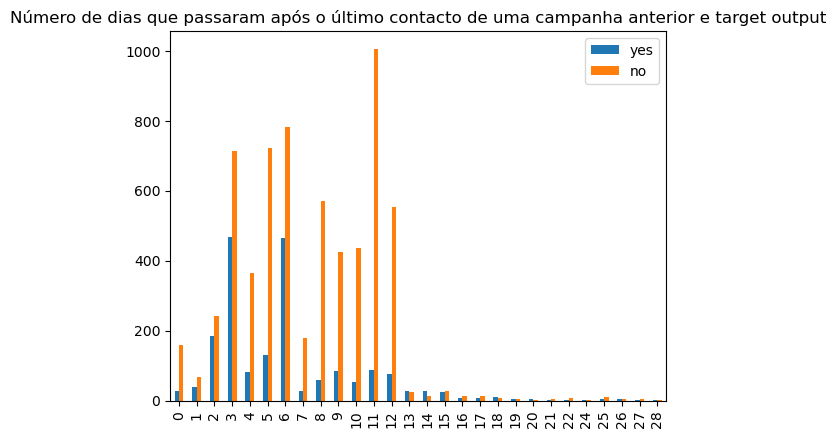

In [34]:
pdays_0 = pd.DataFrame()
pdays_0['yes'] = bank[(bank['y'] == 1) & (bank['pdays'] > -1)]['pdays'].value_counts().sort_index()
pdays_0['no'] = bank[(bank['y'] == 0) & (bank['pdays'] > -1)]['pdays'].value_counts().sort_index()
pdays_0.plot.bar(title = 'Número de dias que passaram após o último contacto de uma campanha anterior e target output')

In [35]:
bank['pdays'].unique()

array([-1,  5,  3,  2,  4,  6,  0,  1,  8,  7,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 20, 19, 22, 21, 25, 24, 26, 23, 27, 28, 29])

In [36]:
pdays_0.value_counts

<bound method DataFrame.value_counts of     yes    no
0    28   160
1    40    66
2   183   241
3   468   713
4    82   365
5   130   722
6   464   783
7    27   180
8    58   570
9    83   424
10   52   437
11   87  1006
12   76   552
13   27    23
14   27    12
15   25    26
16    7    12
17    8    14
18   10     8
19    4     5
20    3     1
21    1     5
22    2     7
24    2     1
25    3     9
26    5     3
27    1     3
28    2     1>

In [37]:
#percentagem do número de meses após ter sido efetuado um contacto com o cliente, e ele ter dito sim ao depósito
(pdays_0['yes'] / (pdays_0['yes'] + pdays_0['no'])) * 100

0     14.893617
1     37.735849
2     43.160377
3     39.627434
4     18.344519
5     15.258216
6     37.209302
7     13.043478
8      9.235669
9     16.370809
10    10.633947
11     7.959744
12    12.101911
13    54.000000
14    69.230769
15    49.019608
16    36.842105
17    36.363636
18    55.555556
19    44.444444
20    75.000000
21    16.666667
22    22.222222
24    66.666667
25    25.000000
26    62.500000
27    25.000000
28    66.666667
dtype: float64

### Atributo 'poutcome'

Observa-se que tem dois atributos - 'unknown' e 'other'.
O valor 'unknown' não traz informação adicional, pelo que justifica-se 
inseri-lo dentro do valor 'other'.
Apesar de não terem exatamente o mesmo significado, no contexto do problema, simbolizam o mesmo.

Adicionalmente, com label encoding, alteramos:
 - success -> 1
 - failure -> 0
 - other   -> -1
 
 ...uma vez que existe uma ordem implícita, desde exceção, sucesso e falha.
 Apesar da maioria esmagadora encontrar-se no other, temos pela observação do gráfico em cima que, quando é sucesso,
 a probabilidade de fazer um depósito é maior.

In [38]:
bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [39]:
map_poutcome = { 'poutcome' : {'unknown' : 'other' }}
bank.replace(map_poutcome, inplace=True)

In [40]:
bank['poutcome'].value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [41]:
lb = LabelBinarizer()
lb_results = lb.fit_transform(bank['poutcome'])
lb_results_bank = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_bank.head()

failure  other  success
0        0      1        0
1        0      1        0
2        0      1        0
3        0      1        0
4        0      1        0

In [42]:
bank = pd.concat([bank, lb_results_bank], axis=1)

In [43]:
bank.drop('poutcome', axis=1, inplace=True)

### Atributo 'balance'

Conseguimos visuaizar pela boxplot, que o atributo balance tem um elevado número
de outliers, nomeadamente no seu upper bound.

Deste modo, o seu tratamento vai divergir.

Definiu-se que se o número de outliers fosse inferior a 5%, procedia-se à remoção das respetivas linhas, caso contrário escolhia-se a melhor opção (neste caso para valores numéricos).

Como os valores no lower bound correspondem a menos de 5% dos dados, na totalidade, 
procede-se à sua remoção. São na totalidade 1962 correspondências.

Por outro lado, no upper bound, os outliers correspondem a 10% da totalidade dos dados; 
Neste caso, escolheu-se a transformação com log (Log Transformation) uma vez que o atributo tem valores muito enviesados.
Neste caso, os valores vão ser aproximados ao normal; dentro das possibilidades.

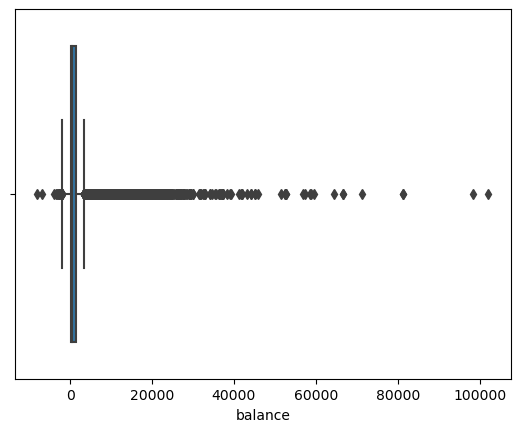

In [44]:
sns.boxplot(x = bank['balance'])
plt.show()

Obter o valore do lower e upper bound da feature balance.

In [45]:
Q1 = bank['balance'].quantile(0.25)
Q3 = bank['balance'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lowerLim = Q1 - 1.5 * IQR
upperLim = Q3 + 1.5 * IQR

print(lowerLim)
print(upperLim)

1356.0
-1962.0
3462.0


Obter o número de valores no upper e lower bound.

In [46]:
bank[bank['balance'] < lowerLim]['balance'].count()

17

In [47]:
bank[bank['balance'] > upperLim]['balance'].count()

4712

In [48]:
bank = bank.drop(bank.loc[bank['balance'] < lowerLim].index)
bank.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='balance'>

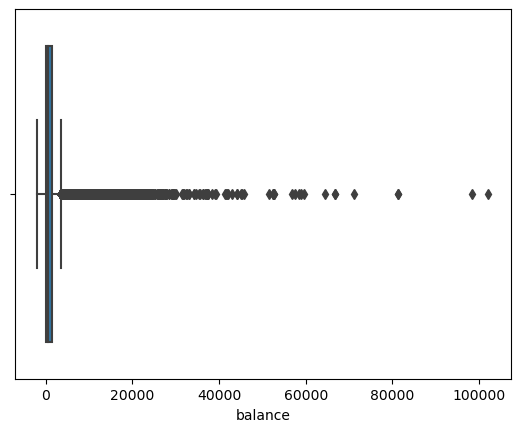

In [49]:
sns.boxplot(x = bank['balance'])

In [50]:
bank['balance'].mask(bank['balance'] > upperLim, upperLim, inplace=True)

<AxesSubplot:xlabel='balance'>

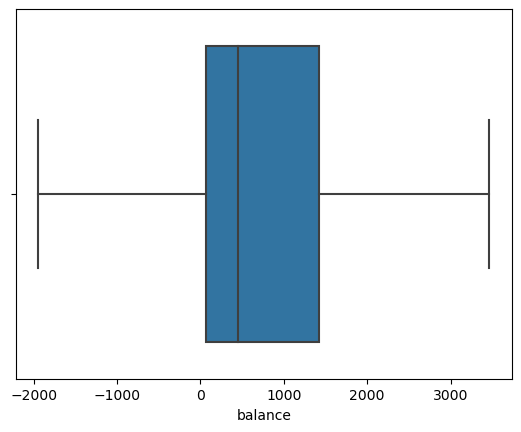

In [51]:
sns.boxplot(x = bank['balance'])

In [52]:
scaler = MinMaxScaler(feature_range=(-1,1))
bank['balance'] = scaler.fit_transform(bank[['balance']])

### Atributo 'previous'

Após uma breve análise do atributo previous, interpretou-se que o valor 0 tem um significado
especial em relação aos demais valores. 

Para além disso, existe uma grande discrepância nos
valores ̸= 0, levando à existência de bastantes outliers. 

Assim, optou-se por substituir como:
previous = 0 => "0"
previous > 0 => "1"
Permitindo categorizar entre: nunca ter recebido contacto ou já ter recebido, levando à manutenção da precisão global.

Ou seja, proceder a uma normalização dos dados.

In [53]:
bank['previous'].value_counts()

0      36937
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

<AxesSubplot:title={'center':'Número de contactos realizados antes desta campanha e target output'}>

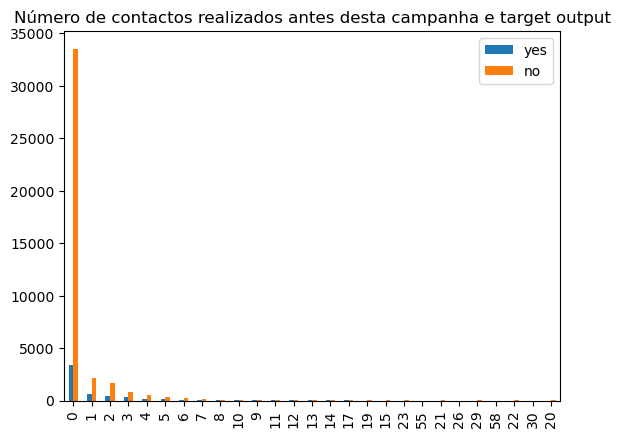

In [54]:
previous_target = pd.DataFrame()
previous_target['yes'] = bank[bank['y'] == 1]['previous'].value_counts()
previous_target['no'] = bank[bank['y'] == 0]['previous'].value_counts()
previous_target.plot.bar(title = 'Número de contactos realizados antes desta campanha e target output')

In [55]:
bank['previous'].mask(bank['previous'] > 0, 1, inplace=True)
print(bank['previous'])

0        0
1        0
2        0
3        0
4        0
        ..
45189    0
45190    0
45191    1
45192    0
45193    1
Name: previous, Length: 45194, dtype: int64


### Atributo 'age'

A análise da idade foi efetuado com recurso à construção de um scatter plot com o número de
ocorrências de cada idade. 

Pode-se visualizar que a distribução é pouco uniforme, com
maior ênfase na idade entre os 31 e 60 anos. 

Assim, para homogeneizar a amostra procedemos ao binning dos dados;
Neste caso, com 4 bins.


In [56]:
age_counts = bank['age'].value_counts()
bank['age_count'] = bank['age'].map(age_counts)
print(bank['age_count'])

0         740
1        1136
2        1972
3        1088
4        1972
         ... 
45189     934
45190      54
45191      52
45192     827
45193    1696
Name: age_count, Length: 45194, dtype: int64


<AxesSubplot:xlabel='age', ylabel='age_count'>

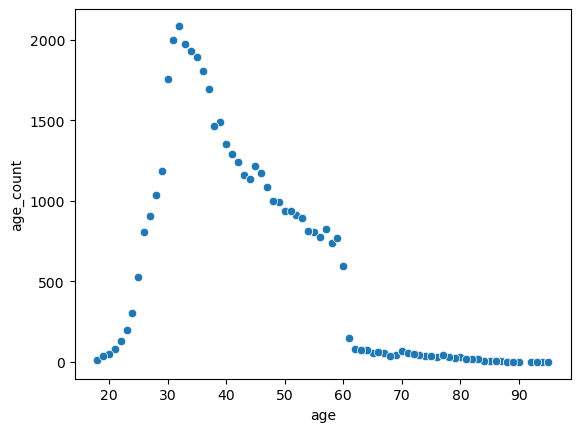

In [57]:
sns.scatterplot(data=bank, x="age", y="age_count")

In [58]:
bank = bank.drop('age_count', axis=1)

In [59]:
estimator = preprocessing.KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
bank['age'] = estimator.fit_transform(bank[['age']])

print('Bin Edges')
print(estimator.bin_edges_[0])
print('Age groups')
print (bank.groupby(by=['age']).count())

Bin Edges
[18. 33. 39. 48. 95.]
Age groups
       job  marital  education  default  balance  housing   loan  contact  \
age                                                                         
0.0  11110    11110      11110    11110    11110    11110  11110    11110   
1.0  10762    10762      10762    10762    10762    10762  10762    10762   
2.0  11147    11147      11147    11147    11147    11147  11147    11147   
3.0  12175    12175      12175    12175    12175    12175  12175    12175   

       day  month  duration  campaign  pdays  previous      y  failure  other  \
age                                                                             
0.0  11110  11110     11110     11110  11110     11110  11110    11110  11110   
1.0  10762  10762     10762     10762  10762     10762  10762    10762  10762   
2.0  11147  11147     11147     11147  11147     11147  11147    11147  11147   
3.0  12175  12175     12175     12175  12175     12175  12175    12175  12175   

     su

### Atributo 'job' 
 - Remover os valores não conhecidos ('unknown').
 - Utilizar o binary encoding uma vez que o atributo job é categórico e não apresenta qualquer ordem e porque gera menos complexidade(menos colunas) que o one-hot enconding.

In [60]:
#percentagem de unknows em job
(bank[bank['job'] == "unknown"]['job'].count() / bank['job'].count()) * 100

0.6372527326636279

In [61]:
bank.drop(bank[bank['job'] == 'unknown'].index, inplace=True)
bank.reset_index(drop=True, inplace=True)
bank_data = bank.copy()
bank_data

age           job   marital  education  default   balance  housing  \
0      3.0    management   married   tertiary        0  0.512024        1   
1      2.0    technician    single  secondary        0 -0.270070        1   
2      1.0  entrepreneur   married  secondary        0 -0.280059        1   
3      2.0   blue-collar   married    unknown        0  0.276360        1   
4      1.0    management   married   tertiary        0 -0.195339        1   
...    ...           ...       ...        ...      ...       ...      ...   
44901  3.0    technician   married   tertiary        0  0.024417        0   
44902  3.0       retired  divorced    primary        0  0.358861        0   
44903  3.0       retired   married  secondary        0  1.000000        0   
44904  3.0   blue-collar   married  secondary        0 -0.033666        0   
44905  1.0  entrepreneur   married  secondary        0  0.818350        0   

       loan    contact  day  month  duration  campaign  pdays  previous  y  \
0         0    unknown    5      5       261         1     -1         0  0   
1         0    unknown    5      5       151         1     -1         0  0   
2         1    unknown    5      5        76         1     -1         0  0   
3         0    unknown    5      5        92         1     -1         0  0   
4         0    unknown    5      5       139         1     -1         0  0   
...     ...        ...  ...    ...       ...       ...    ...       ... ..   
44901     0   cellular   17     11       977         3     -1         0  1   
44902     0   cellular   17     11       456         2     -1         0  1   
44903     0   cellular   17     11      1127         5      6         1  1   
44904     0  telephone   17     11       508         4     -1         0  0   
44905     0   cellular   17     11       361         2      6         1  0   

       failure  other  success  
0            0      1        0  
1            0      1        0  
2            0      1        0  
3            0      1        0  
4            0      1        0  
...        ...    ...      ...  
44901        0      1        0  
44902        0      1        0  
44903        0      0        1  
44904        0      1        0  
44905        0      1        0  

[44906 rows x 19 columns]

In [62]:
#binary enconding para job substituindo a coluna job por uma binária
enconder = ce.BinaryEncoder(cols=['job'], return_df=True)
bank = enconder.fit_transform(bank)
bank

age  job_0  job_1  job_2  job_3   marital  education  default  \
0      3.0      0      0      0      1   married   tertiary        0   
1      2.0      0      0      1      0    single  secondary        0   
2      1.0      0      0      1      1   married  secondary        0   
3      2.0      0      1      0      0   married    unknown        0   
4      1.0      0      0      0      1   married   tertiary        0   
...    ...    ...    ...    ...    ...       ...        ...      ...   
44901  3.0      0      0      1      0   married   tertiary        0   
44902  3.0      0      1      0      1  divorced    primary        0   
44903  3.0      0      1      0      1   married  secondary        0   
44904  3.0      0      1      0      0   married  secondary        0   
44905  1.0      0      0      1      1   married  secondary        0   

        balance  housing  ...  day month  duration  campaign  pdays  previous  \
0      0.512024        1  ...    5     5       261         1     -1         0   
1     -0.270070        1  ...    5     5       151         1     -1         0   
2     -0.280059        1  ...    5     5        76         1     -1         0   
3      0.276360        1  ...    5     5        92         1     -1         0   
4     -0.195339        1  ...    5     5       139         1     -1         0   
...         ...      ...  ...  ...   ...       ...       ...    ...       ...   
44901  0.024417        0  ...   17    11       977         3     -1         0   
44902  0.358861        0  ...   17    11       456         2     -1         0   
44903  1.000000        0  ...   17    11      1127         5      6         1   
44904 -0.033666        0  ...   17    11       508         4     -1         0   
44905  0.818350        0  ...   17    11       361         2      6         1   

       y  failure  other  success  
0      0        0      1        0  
1      0        0      1        0  
2      0        0      1        0  
3      0        0      1        0  
4      0        0      1        0  
...   ..      ...    ...      ...  
44901  1        0      1        0  
44902  1        0      1        0  
44903  1        0      0        1  
44904  0        0      1        0  
44905  0        0      1        0  

[44906 rows x 22 columns]

#### Atributo 'marital', 'contact' e 'education'
 - Remover devido a não existir qualquer relação entre os difentes valores destes atributos e o target(a proporção entres os valores dos atributos e o target são próximas), tal como se pode verificar na secção de análise dos dados.

In [63]:
bank.drop('marital', axis=1, inplace=True)

In [64]:
bank.drop('contact', axis=1, inplace=True)

In [65]:
bank.drop('education', axis=1, inplace=True)

In [66]:
bank

age  job_0  job_1  job_2  job_3  default   balance  housing  loan  day  \
0      3.0      0      0      0      1        0  0.512024        1     0    5   
1      2.0      0      0      1      0        0 -0.270070        1     0    5   
2      1.0      0      0      1      1        0 -0.280059        1     1    5   
3      2.0      0      1      0      0        0  0.276360        1     0    5   
4      1.0      0      0      0      1        0 -0.195339        1     0    5   
...    ...    ...    ...    ...    ...      ...       ...      ...   ...  ...   
44901  3.0      0      0      1      0        0  0.024417        0     0   17   
44902  3.0      0      1      0      1        0  0.358861        0     0   17   
44903  3.0      0      1      0      1        0  1.000000        0     0   17   
44904  3.0      0      1      0      0        0 -0.033666        0     0   17   
44905  1.0      0      0      1      1        0  0.818350        0     0   17   

       month  duration  campaign  pdays  previous  y  failure  other  success  
0          5       261         1     -1         0  0        0      1        0  
1          5       151         1     -1         0  0        0      1        0  
2          5        76         1     -1         0  0        0      1        0  
3          5        92         1     -1         0  0        0      1        0  
4          5       139         1     -1         0  0        0      1        0  
...      ...       ...       ...    ...       ... ..      ...    ...      ...  
44901     11       977         3     -1         0  1        0      1        0  
44902     11       456         2     -1         0  1        0      1        0  
44903     11      1127         5      6         1  1        0      0        1  
44904     11       508         4     -1         0  0        0      1        0  
44905     11       361         2      6         1  0        0      1        0  

[44906 rows x 19 columns]

### Análise do heatmap da matriz de correlação

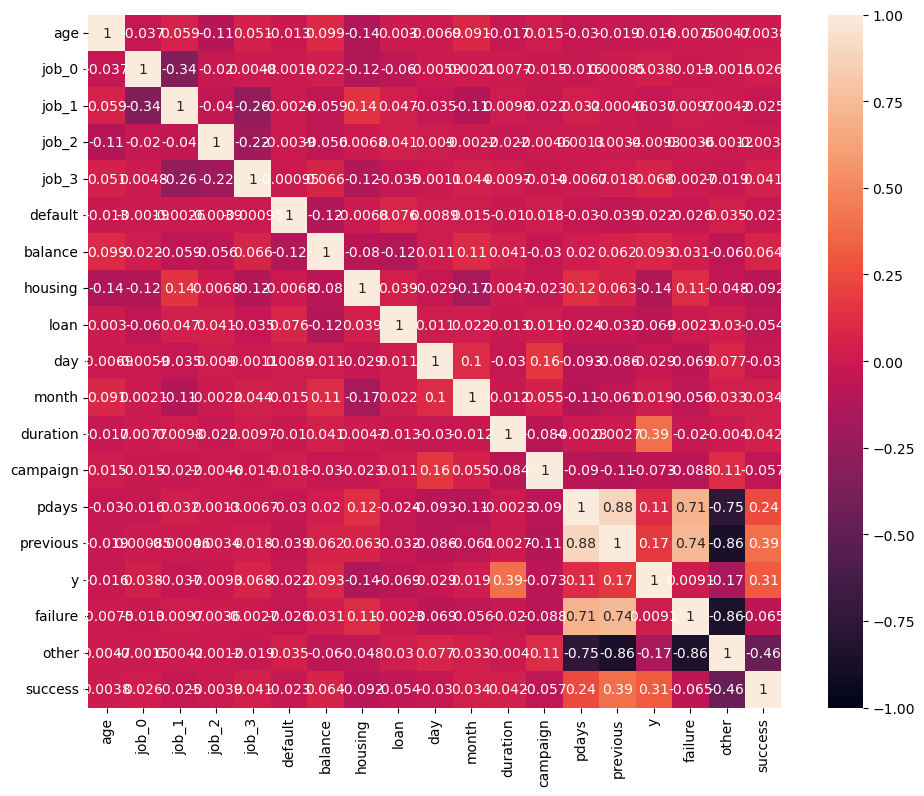

In [67]:
#Correlation
corr_matrix = bank.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

In [68]:
bankCorr = bank.corr()
bankCorr

age     job_0     job_1     job_2     job_3   default  \
age       1.000000 -0.036540  0.059154 -0.110048  0.050953 -0.013002   
job_0    -0.036540  1.000000 -0.338684 -0.019844  0.004849 -0.001890   
job_1     0.059154 -0.338684  1.000000 -0.039989 -0.259321 -0.002576   
job_2    -0.110048 -0.019844 -0.039989  1.000000 -0.216701 -0.003883   
job_3     0.050953  0.004849 -0.259321 -0.216701  1.000000 -0.000946   
default  -0.013002 -0.001890 -0.002576 -0.003883 -0.000946  1.000000   
balance   0.099268  0.022075 -0.058534 -0.056003  0.065786 -0.120994   
housing  -0.136434 -0.123878  0.141252  0.006831 -0.122892 -0.006848   
loan      0.002971 -0.060210  0.046822  0.041227 -0.034904  0.075671   
day      -0.006908 -0.005850 -0.034682  0.009033 -0.001092  0.008943   
month     0.090654  0.002119 -0.105532 -0.002231  0.044463  0.014733   
duration -0.017301  0.007692  0.009778 -0.021701  0.009681 -0.010089   
campaign  0.014507 -0.014504 -0.021852 -0.004604 -0.013542  0.017627   
pdays    -0.030430 -0.015896  0.031785  0.001258 -0.006723 -0.030380   
previous -0.019193  0.000854 -0.000456  0.003405  0.017969 -0.039183   
y        -0.016207  0.038178 -0.037473 -0.009345  0.068122 -0.021980   
failure  -0.007451 -0.013301  0.009739  0.003555 -0.002689 -0.026108   
other     0.004682 -0.001468  0.004225 -0.001180 -0.018763  0.035230   
success   0.003809  0.025891 -0.025080 -0.003864  0.041116 -0.023231   

           balance   housing      loan       day     month  duration  \
age       0.099268 -0.136434  0.002971 -0.006908  0.090654 -0.017301   
job_0     0.022075 -0.123878 -0.060210 -0.005850  0.002119  0.007692   
job_1    -0.058534  0.141252  0.046822 -0.034682 -0.105532  0.009778   
job_2    -0.056003  0.006831  0.041227  0.009033 -0.002231 -0.021701   
job_3     0.065786 -0.122892 -0.034904 -0.001092  0.044463  0.009681   
default  -0.120994 -0.006848  0.075671  0.008943  0.014733 -0.010089   
balance   1.000000 -0.079633 -0.118354  0.010568  0.107741  0.041071   
housing  -0.079633  1.000000  0.038836 -0.028979 -0.174068  0.004703   
loan     -0.118354  0.038836  1.000000  0.011027  0.021910 -0.013140   
day       0.010568 -0.028979  0.011027  1.000000  0.103349 -0.030394   
month     0.107741 -0.174068  0.021910  0.103349  1.000000 -0.011790   
duration  0.041071  0.004703 -0.013140 -0.030394 -0.011790  1.000000   
campaign -0.030238 -0.022591  0.010600  0.161673  0.054644 -0.084347   
pdays     0.019972  0.118997 -0.024348 -0.093415 -0.106424 -0.002272   
previous  0.061527  0.062812 -0.031604 -0.086385 -0.061484  0.002699   
y         0.093455 -0.140057 -0.068751 -0.028650  0.019315  0.394543   
failure   0.030803  0.106432 -0.002266 -0.068821 -0.056178 -0.019870   
other    -0.060164 -0.047592  0.029865  0.077005  0.032710 -0.004008   
success   0.063549 -0.091887 -0.054105 -0.030418  0.033754  0.042207   

          campaign     pdays  previous         y   failure     other   success  
age       0.014507 -0.030430 -0.019193 -0.016207 -0.007451  0.004682  0.003809  
job_0    -0.014504 -0.015896  0.000854  0.038178 -0.013301 -0.001468  0.025891  
job_1    -0.021852  0.031785 -0.000456 -0.037473  0.009739  0.004225 -0.025080  
job_2    -0.004604  0.001258  0.003405 -0.009345  0.003555 -0.001180 -0.003864  
job_3    -0.013542 -0.006723  0.017969  0.068122 -0.002689 -0.018763  0.041116  
default   0.017627 -0.030380 -0.039183 -0.021980 -0.026108  0.035230 -0.023231  
balance  -0.030238  0.019972  0.061527  0.093455  0.030803 -0.060164  0.063549  
housing  -0.022591  0.118997  0.062812 -0.140057  0.106432 -0.047592 -0.091887  
loan      0.010600 -0.024348 -0.031604 -0.068751 -0.002266  0.029865 -0.054105  
day       0.161673 -0.093415 -0.086385 -0.028650 -0.068821  0.077005 -0.030418  
month     0.054644 -0.106424 -0.061484  0.019315 -0.056178  0.032710  0.033754  
duration -0.084347 -0.002272  0.002699  0.394543 -0.019870 -0.004008  0.042207  
campaign  1.000000 -0.090243 -0.107497 -0.072749 -0.087855  0.107775 -0.057236  

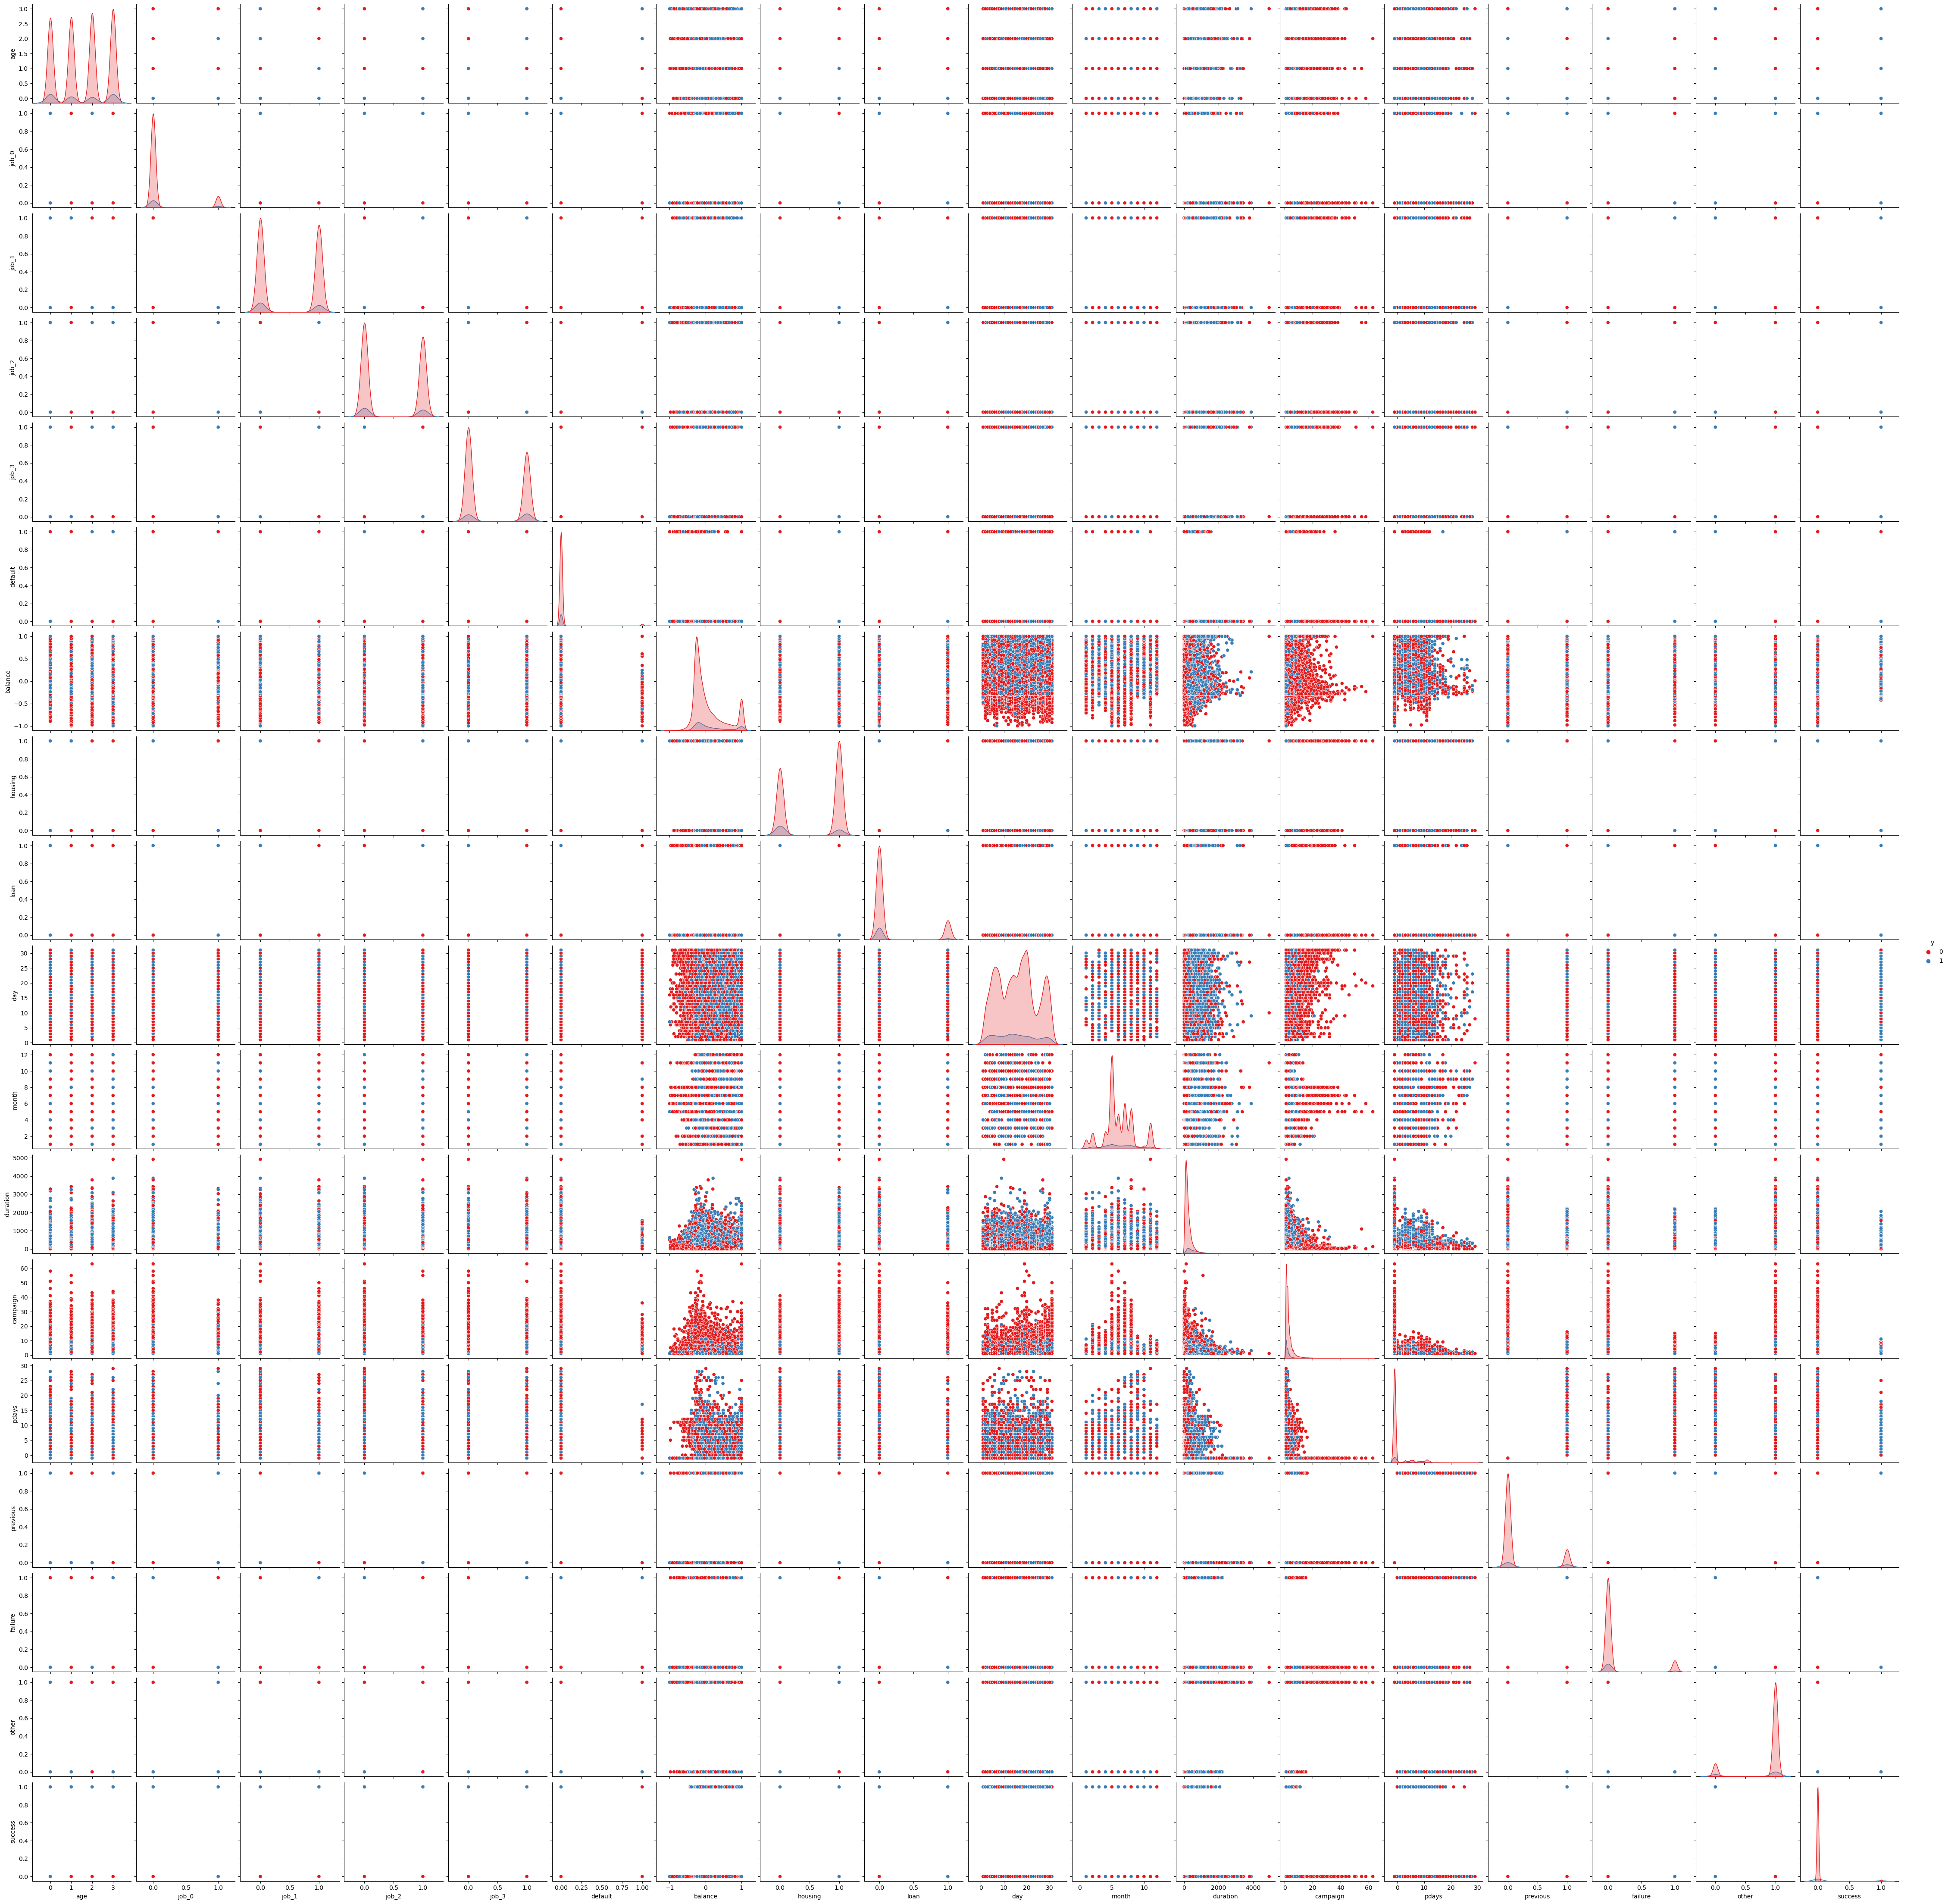

In [129]:
sns.pairplot(bank, hue='y', palette='Set1')

In [69]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44906 entries, 0 to 44905
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       44906 non-null  float64
 1   job_0     44906 non-null  int64  
 2   job_1     44906 non-null  int64  
 3   job_2     44906 non-null  int64  
 4   job_3     44906 non-null  int64  
 5   default   44906 non-null  int64  
 6   balance   44906 non-null  float64
 7   housing   44906 non-null  int64  
 8   loan      44906 non-null  int64  
 9   day       44906 non-null  int64  
 10  month     44906 non-null  int64  
 11  duration  44906 non-null  int64  
 12  campaign  44906 non-null  int64  
 13  pdays     44906 non-null  int64  
 14  previous  44906 non-null  int64  
 15  y         44906 non-null  int64  
 16  failure   44906 non-null  int64  
 17  other     44906 non-null  int64  
 18  success   44906 non-null  int64  
dtypes: float64(2), int64(17)
memory usage: 6.5 MB


## Implementar treino com Decision trees

Implementação do treino dos dados utilizando árvores de decisão.
A distribuição dos dados para treino foi de 25% (standard).

In [70]:
X = bank.drop(['y'], axis=1)
y = bank['y'].to_frame()

In [71]:
X

age  job_0  job_1  job_2  job_3  default   balance  housing  loan  day  \
0      3.0      0      0      0      1        0  0.512024        1     0    5   
1      2.0      0      0      1      0        0 -0.270070        1     0    5   
2      1.0      0      0      1      1        0 -0.280059        1     1    5   
3      2.0      0      1      0      0        0  0.276360        1     0    5   
4      1.0      0      0      0      1        0 -0.195339        1     0    5   
...    ...    ...    ...    ...    ...      ...       ...      ...   ...  ...   
44901  3.0      0      0      1      0        0  0.024417        0     0   17   
44902  3.0      0      1      0      1        0  0.358861        0     0   17   
44903  3.0      0      1      0      1        0  1.000000        0     0   17   
44904  3.0      0      1      0      0        0 -0.033666        0     0   17   
44905  1.0      0      0      1      1        0  0.818350        0     0   17   

       month  duration  campaign  pdays  previous  failure  other  success  
0          5       261         1     -1         0        0      1        0  
1          5       151         1     -1         0        0      1        0  
2          5        76         1     -1         0        0      1        0  
3          5        92         1     -1         0        0      1        0  
4          5       139         1     -1         0        0      1        0  
...      ...       ...       ...    ...       ...      ...    ...      ...  
44901     11       977         3     -1         0        0      1        0  
44902     11       456         2     -1         0        0      1        0  
44903     11      1127         5      6         1        0      0        1  
44904     11       508         4     -1         0        0      1        0  
44905     11       361         2      6         1        0      1        0  

[44906 rows x 18 columns]

In [72]:
y

y
0      0
1      0
2      0
3      0
4      0
...   ..
44901  1
44902  1
44903  1
44904  0
44905  0

[44906 rows x 1 columns]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021, stratify=y)

In [74]:
clf = DecisionTreeClassifier(random_state=2021)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [75]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 1, 0])

### Testar os resultados
 - matriz de confusão
 - accuracy
 - precision
 - recall
 - ROC - AUC

In [76]:
confusion_matrix(y_test, predictions)

array([[7380,  551],
       [ 553,  498]])

In [77]:
accuracy_score(y_test, predictions)

0.8770875083500334

In [78]:
precision_score(y_test, predictions)

0.4747378455672069

In [79]:
recall_score(y_test, predictions)

0.4738344433872502

In [80]:
roc_auc_score(y_test, predictions)

0.7021801141409835

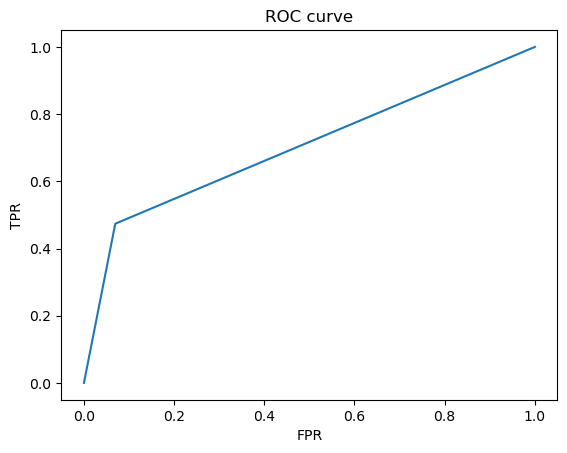

In [81]:
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Implementar treino com Support Vector Machines (SVM's)

Num passo seguinte, procedeu-se à tentativa do treino através de support vector machines.

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35924 entries, 10070 to 43437
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       35924 non-null  float64
 1   job_0     35924 non-null  int64  
 2   job_1     35924 non-null  int64  
 3   job_2     35924 non-null  int64  
 4   job_3     35924 non-null  int64  
 5   default   35924 non-null  int64  
 6   balance   35924 non-null  float64
 7   housing   35924 non-null  int64  
 8   loan      35924 non-null  int64  
 9   day       35924 non-null  int64  
 10  month     35924 non-null  int64  
 11  duration  35924 non-null  int64  
 12  campaign  35924 non-null  int64  
 13  pdays     35924 non-null  int64  
 14  previous  35924 non-null  int64  
 15  failure   35924 non-null  int64  
 16  other     35924 non-null  int64  
 17  success   35924 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 5.2 MB


In [83]:
cross_valid_model = SVC(random_state=2021)
scores = cross_val_score(cross_valid_model, X_train, np.ravel(y_train), cv=10)
scores

array([0.88895074, 0.88561091, 0.88811578, 0.88616755, 0.88752784,
       0.89142539, 0.89003341, 0.88446548, 0.88836303, 0.89420935])

In [84]:
print("%0.2f accuracy" % (scores.mean() * 100))

88.85 accuracy


In [85]:
model = SVC(random_state=2021)
model.fit(X_train, np.ravel(y_train))

SVC(random_state=2021)

In [86]:
predictions = model.predict(X_test)

In [87]:
print("%0.2f accuracy" % accuracy_score(y_test, predictions))

0.89 accuracy


/home/josefam/miniconda3/envs/daa/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


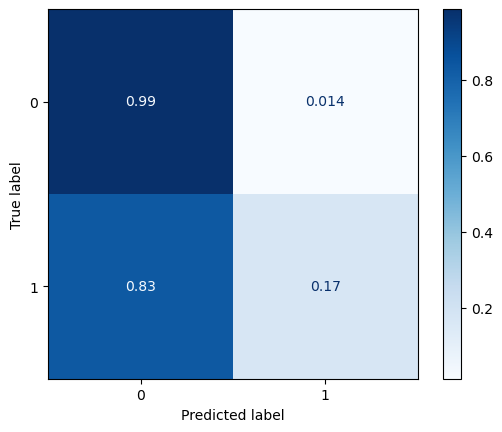

In [88]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

In [89]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7931
           1       0.62      0.17      0.26      1051

    accuracy                           0.89      8982
   macro avg       0.76      0.58      0.60      8982
weighted avg       0.87      0.89      0.86      8982



In [93]:
param_grid = {'C': [1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}

In [94]:
grid = GridSearchCV(SVC(random_state=2021), param_grid, refit=True, verbose=3, n_jobs=-1)

In [95]:
grid.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.889 total time= 3.1min
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.888 total time= 4.1min
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.888 total time= 3.4min


KeyboardInterrupt: 

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=100, gamma=0.001, random_state=2021)

/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


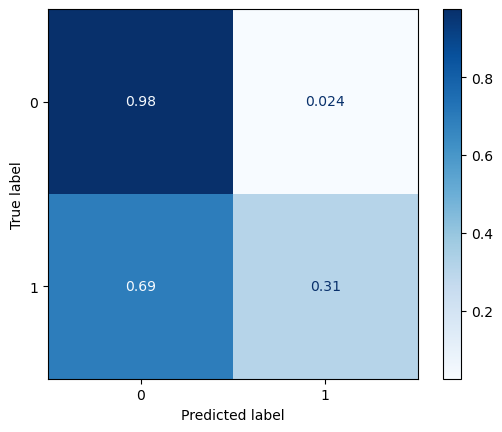

In [ ]:
plot_confusion_matrix(grid, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7931
           1       0.62      0.31      0.41      1051

    accuracy                           0.90      8982
   macro avg       0.77      0.64      0.68      8982
weighted avg       0.88      0.90      0.88      8982



### Implementar o treino com MLP (redes neurais)

Por fim, aplicar o treino com MLP's.

In [ ]:
#Scale the data
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
#scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
#y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

In [ ]:
X.head()

age  job_0  job_1  job_2  job_3  default   balance  housing  loan  day  \
0  3.0      0      0      0      1        0  0.512024        1     0    5   
1  2.0      0      0      1      0        0 -0.270070        1     0    5   
2  1.0      0      0      1      1        0 -0.280059        1     1    5   
3  2.0      0      1      0      0        0  0.276360        1     0    5   
4  1.0      0      0      0      1        0 -0.195339        1     0    5   

   month  duration  campaign  pdays  previous  failure  other  success  
0      5       261         1     -1         0        0      1        0  
1      5       151         1     -1         0        0      1        0  
2      5        76         1     -1         0        0      1        0  
3      5        92         1     -1         0        0      1        0  
4      5       139         1     -1         0        0      1        0

In [ ]:
y.head()

y
0  0
1  0
2  0
3  0
4  0

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=RANDOM_SEED, stratify=y)

In [84]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(36, input_dim=18, activation='relu'))
    model.add(Dense(29, activation='relu'))
    model.add(Dense(22, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        metrics=['accuracy']
    )
    return model

In [85]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                684       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 1)                 19        
                                                                 
Total params: 1,369
Trainable params: 1,369
Non-trainable params: 0
_________________________________________________________________


2022-11-24 14:40:22.431721: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 14:40:22.434392: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [98]:
TUNING_DICT = {
    #'activation': ['relu', 'sigmoid'],
    'learning_rate' : [0.01, 0.001],
    'batch_size' : [32],
    'epochs' : [20]
}

In [99]:
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

model = KerasClassifier(build_model, activation='relu', learning_rate=0.01)
grid_search = GridSearchCV(estimator = model,
                           param_grid = TUNING_DICT,
                           cv = kf,
                           scoring = 'accuracy',
                           refit= 'True',
                           verbose = 1,
                           n_jobs = -1)

grid_search.fit(X_train, y_train, validation_split=0.2)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_546/3310072646.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_model, activation='relu', learning_rate=0.01)
2022-11-24 15:12:02.824558: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 15:12:02.850582: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the a

Epoch 1/20
Epoch 1/20


2022-11-24 15:12:10.714033: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20


2022-11-24 15:12:11.581711: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 15:12:11.593217: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/20
Epoch 1/20


2022-11-24 15:12:12.257718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 15:12:12.265764: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/20
719/719 [==============================] - 12s 13ms/step - loss: 0.2744 - accuracy: 0.8956 - val_loss: 0.2463 - val_accuracy: 0.9003
Epoch 2/20
719/719 [==============================] - 12s 13ms/step - loss: 0.3250 - accuracy: 0.8892 - val_loss: 0.2828 - val_accuracy: 0.8949
Epoch 2/20
719/719 [==============================] - 12s 13ms/step - loss: 0.2816 - accuracy: 0.8933 - val_loss: 0.2468 - val_accuracy: 0.9000
Epoch 2/20
719/719 [==============================] - 12s 14ms/step - loss: 0.3289 - accuracy: 0.8882 - val_loss: 0.2865 - val_accuracy: 0.8951
Epoch 2/20
719/719 [==============================] - 14s 15ms/step - loss: 0.2797 - accuracy: 0.8934 - val_loss: 0.2440 - val_accuracy: 0.8963
Epoch 2/20
719/719 [==============================] - 14s 15ms/step - loss: 0.3250 - accuracy: 0.8887 - val_loss: 0.2875 - val_accuracy: 0.8954
Epoch 2/20
719/719 [==============================] - 9s 13ms/step - loss: 0.2516 - accuracy: 0.8991 - val_loss: 0.2405 - val_accuracy: 

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f586008e040>,
             n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [20],
                         'learning_rate': [0.01, 0.001]},
             refit='True', scoring='accuracy', verbose=1)

In [100]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
accuracy = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for accuracy, param in zip(accuracy, params):
    print("%f with: %r" % (accuracy, param))

Best: 0.898369 using {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.01}
0.898369 with: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.01}
0.898313 with: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001}


In [101]:
best_mlp_model = grid_search.best_estimator_

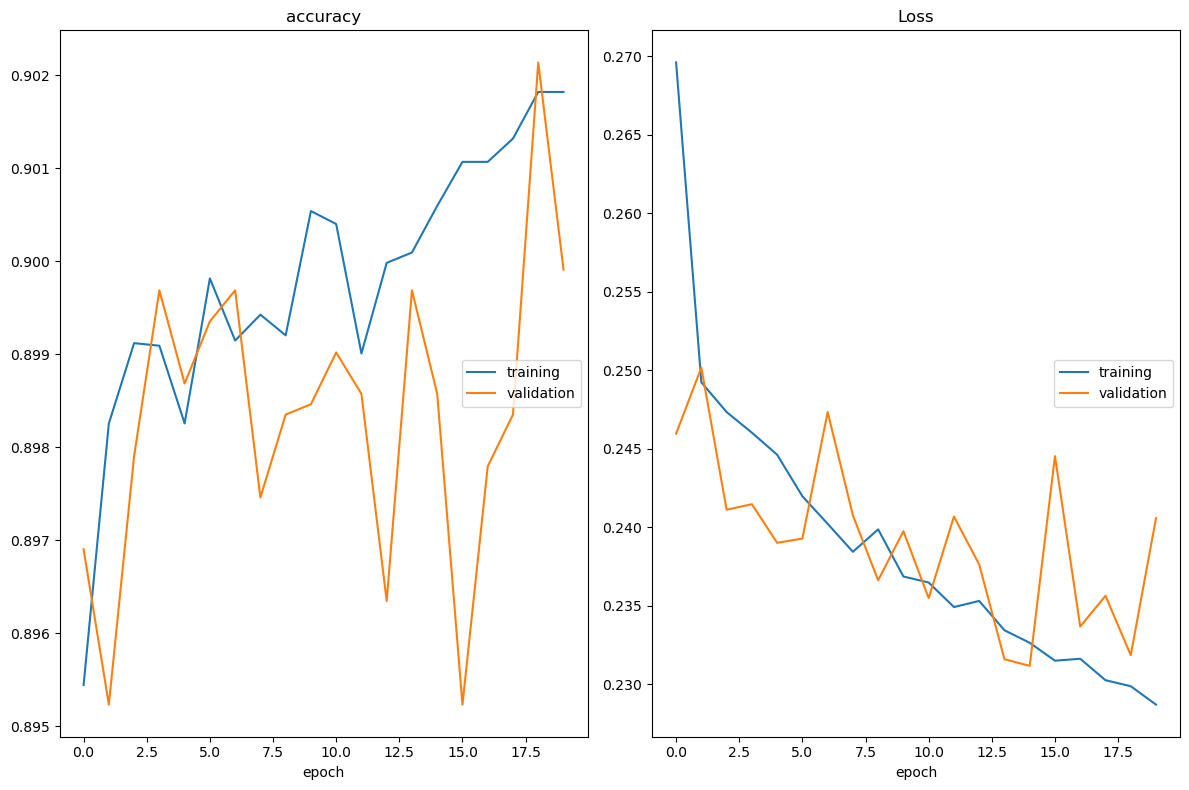

accuracy
	training         	 (min:    0.895, max:    0.902, cur:    0.902)
	validation       	 (min:    0.895, max:    0.902, cur:    0.900)
Loss
	training         	 (min:    0.229, max:    0.270, cur:    0.229)
	validation       	 (min:    0.231, max:    0.250, cur:    0.241)
1123/1123 [==============================] - 31s 28ms/step - loss: 0.2287 - accuracy: 0.9018 - val_loss: 0.2406 - val_accuracy: 0.8999


In [103]:
best_mlp_model.fit(X_train, y_train, 
                   validation_data=(X_test, y_test),
                   callbacks=[PlotLossesKerasTF()], verbose=1)